In [1]:
# AJONEUVOJEN AVOIN DATA 5.13 -AINEISTO 14.2.2021

# Ajoneuvojen avoin data sisältää kaikkien liikennekäytössä olevien ajoneuvojen rekisteröinti-, hyväksyntä- ja 
# teknisiä tietoja Traficomin ylläpitämästä liikenneasioiden rekisteristä.  
# Samasta osoitteesta löytyy myös aineistokuvaus ja muuttujaluettelo Excel-muodossa:

# https://www.traficom.fi/fi/ajankohtaista/avoin-data

# Ajoneuvojen avoin data 5.13 -aineisto sisältää kaikkien liikennekäytössä olevien ajoneuvojen rekisteröinti-, 
# hyväksyntä- ja teknisiä tietoja Traficomin ylläpitämästä liikenneasioiden rekisteristä.

# - Aineistossa on rivejä 5 121 148 kpl
# - Aineiston päivämäärä 31.12.2020
# - Julkaisuajankohta 3.2.2021
# - Tiedostomuoto: ZIP-pakattu CSV  (teksti, koodaus ISO8859-1)
# - Tiedoston koko: 875 Mt (pakattuna 203 Mt)

import pandas as pd

In [2]:
# Datan avaus
df = pd.read_csv('TieliikenneAvoinData_5_13.csv', sep = ';', encoding = 'cp1252')

# Kuinka monta riviä ja saraketta datassa on?
df.shape

C:\Users\Marko\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (18,27,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(5121147, 38)

In [3]:
# Poimitaan datasta vain henkilöautot (ajoneuvoluokat M1 ja M1G)
df = df[df['ajoneuvoluokka'].isin(['M1', 'M1G'])]

In [4]:
# Varmistetaan, että päivämäärät tunnistuvat päivämääriksi
df['ensirekisterointipvm'] = pd.to_datetime(df['ensirekisterointipvm'], format = '%Y-%m-%d')

In [5]:
# Rajoitutaan vuoden 2019 alusta lähtien rekisteröityihin
df = df[df['ensirekisterointipvm'] > '2019-01-01'].sort_values(by = 'ensirekisterointipvm')

In [6]:
# Poistetaan osa muuttujista
df = df.drop(['ajoneuvoryhma', 'ajoneuvonkaytto', 'variantti', 'versio', 'ovienLukumaara', 'korityyppi', 'omamassa', 'teknSuurSallKokmassa', 'tieliikSuurSallKokmassa', 'ajonKokPituus', 'ajonLeveys', 'ajonKorkeus', 'suurinNettoteho', 'ahdin', 'tyyppihyvaksyntanro', 'valmistenumero2', 'jarnro', 'ohjaamotyyppi', 'istumapaikkojenLkm', 'sylintereidenLkm', 'vaihteidenLkm', 'voimanvalJaTehostamistapa', 'yksittaisKayttovoima', 'matkamittarilukema'], axis = 1)
# Kuinka monta riviä ja saraketta datassa on?
df.shape

(286057, 14)

In [7]:
# Tallennus csv-muotoon
df.to_csv('autot.csv', index = False)

In [8]:
pd.set_option.display_columns = None

In [9]:
df = pd.read_csv('autot.csv')
df.head()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,Co2
0,M1,2019-01-02,20190102,1,1.0,1798.0,True,2.0,Toyota,TOYOTA C-HR Viistoperä (AB) 4ov 1798cm3,3,TOYOTA C-HR,758.0,86.0
1,M1,2019-01-02,20190102,8,1.0,1498.0,False,NaN,Skoda,OCTAVIA Farmari (AC) 4ov 1498cm3 A,2,OCTAVIA,98.0,116.0
2,M1,2019-01-02,20180122,6,1.0,1498.0,False,NaN,Honda,HR-V Monikäyttöajoneuvo (AF) 5ov 1498cm3,3,HR-V,564.0,125.0
3,M1,2019-01-02,20190102,2,2.0,1598.0,False,NaN,Hyundai,TUCSON Monikäyttöajoneuvo (AF) 5ov 1598cm3 A,2,TUCSON,297.0,125.0
4,M1,2019-01-02,20060628,0,1.0,1980.0,False,NaN,Saab,9-5 Farmari (AC) 5ov 1980cm3 A,2,9-5,851.0,251.0


In [10]:
df.tail()

,ajoneuvoluokka,ensirekisterointipvm,kayttoonottopvm,vari,kayttovoima,iskutilavuus,sahkohybridi,sahkohybridinluokka,merkkiSelvakielinen,mallimerkinta,vaihteisto,kaupallinenNimi,kunta,Co2
286052,M1,2020-12-31,20201231,0,1.0,999.0,True,2.0,"Volkswagen, VW",GOLF Farmari (AC) 5ov 999cm3 A,2,GOLF,684.0,100.0
286053,M1,2020-12-31,20201231,9,2.0,1995.0,False,NaN,Ford,Mondeo Viistoperä (AB) 4ov 1995cm3 A,2,Mondeo,91.0,127.0
286054,M1,2020-12-31,20201231,6,1.0,999.0,True,2.0,"Volkswagen, VW",GOLF Farmari (AC) 5ov 999cm3 A,2,GOLF,91.0,98.0
286055,M1,2020-12-31,20201231,2,1.0,1332.0,False,NaN,Renault,CAPTUR Viistoperä (AB) 5ov 1332cm3 A,2,CAPTUR,529.0,124.0
286056,M1,2020-12-31,20150814,9,38.0,1395.0,False,NaN,"Volkswagen, VW",GOLF Farmari (AC) 5ov 1395cm3,1,GOLF,186.0,94.0


In [11]:
# Muuttujien ainutkertaiset arvot
# Näiden avulla on helppo huomata virheellisiä/epäilyttäviä arvoja
for var in df:
    print(var, df[var].unique())

ajoneuvoluokka ['M1' 'M1G']
ensirekisterointipvm ['2019-01-02' '2019-01-03' '2019-01-04' '2019-01-05' '2019-01-07'
 '2019-01-08' '2019-01-09' '2019-01-10' '2019-01-11' '2019-01-12'
 '2019-01-13' '2019-01-14' '2019-01-15' '2019-01-16' '2019-01-17'
 '2019-01-18' '2019-01-19' '2019-01-21' '2019-01-22' '2019-01-23'
 '2019-01-24' '2019-01-25' '2019-01-26' '2019-01-28' '2019-01-29'
 '2019-01-30' '2019-01-31' '2019-02-01' '2019-02-02' '2019-02-04'
 '2019-02-05' '2019-02-06' '2019-02-07' '2019-02-08' '2019-02-09'
 '2019-02-11' '2019-02-12' '2019-02-13' '2019-02-14' '2019-02-15'
 '2019-02-16' '2019-02-18' '2019-02-19' '2019-02-20' '2019-02-21'
 '2019-02-22' '2019-02-23' '2019-02-25' '2019-02-26' '2019-02-27'
 '2019-02-28' '2019-03-01' '2019-03-02' '2019-03-04' '2019-03-05'
 '2019-03-06' '2019-03-07' '2019-03-08' '2019-03-09' '2019-03-11'
 '2019-03-12' '2019-03-13' '2019-03-14' '2019-03-15' '2019-03-16'
 '2019-03-17' '2019-03-18' '2019-03-19' '2019-03-20' '2019-03-21'
 '2019-03-22' '2019-03-23' 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286057 entries, 0 to 286056
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ajoneuvoluokka        286057 non-null  object 
 1   ensirekisterointipvm  286057 non-null  object 
 2   kayttoonottopvm       286057 non-null  int64  
 3   vari                  284520 non-null  object 
 4   kayttovoima           286057 non-null  float64
 5   iskutilavuus          278664 non-null  float64
 6   sahkohybridi          285562 non-null  object 
 7   sahkohybridinluokka   70581 non-null   float64
 8   merkkiSelvakielinen   286056 non-null  object 
 9   mallimerkinta         286056 non-null  object 
 10  vaihteisto            284422 non-null  object 
 11  kaupallinenNimi       285575 non-null  object 
 12  kunta                 286048 non-null  float64
 13  Co2                   238370 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 30.

In [13]:
# Värit selväkielisinä (löytyvät Excel-muotoisesta aineistokuvauksesta)
varit = {'0':'Musta',
    '1':'Ruskea (beige)',
    '2':'Punainen',
    '3':'Oranssi',
    '4':'Keltainen',
    '5':'Vihreä',
    '6':'Sininen',
    '7':'Violetti',
    '8':'Harmaa',
    '9':'Valkoinen',
    'X':'Monivär.',
    'Y':'Hopea',
    'Z':'Turkoosi'}
df['vari'] = df['vari'].replace(varit)

In [14]:
# Kuinka suosittuja ovat eri värit olleet?
df['vari'].value_counts()

Valkoinen         75405
Harmaa            57880
Musta             54653
Sininen           31234
Punainen          27811
Hopea             17337
Ruskea (beige)    12044
Vihreä             2908
Oranssi            2482
Keltainen          1813
Violetti            643
Turkoosi            156
Monivär.            154
Name: vari, dtype: int64

In [15]:
# 20 suosituinta merkkiä
df_suositut = pd.crosstab(df['merkkiSelvakielinen'], 'Lukumäärä').nlargest(n = 20, columns = 'Lukumäärä' )
df_suositut

col_0,Lukumäärä
merkkiSelvakielinen,
Toyota,32650
Volvo,30884
Mercedes-Benz,29170
"Volkswagen, VW",27444
Skoda,23033
BMW,18948
Ford,15873
Kia,14658
Audi,13241


In [16]:
# Värit eri merkeillä
df1 = pd.crosstab(df['merkkiSelvakielinen'], df['vari'])

# Suosituimmat värit suosituimmilla merkeillä
df1[df1.index.isin(df_suositut.index)].style.highlight_max(color='lightgreen', axis = 1)

vari,Harmaa,Hopea,Keltainen,Monivär.,Musta,Oranssi,Punainen,Ruskea (beige),Sininen,Turkoosi,Valkoinen,Vihreä,Violetti
merkkiSelvakielinen,,,,,,,,,,,,,
Audi,2478,806,70,2,3704,33,704,324,1162,8,3610,240,5
BMW,3443,798,30,4,6781,134,330,587,1976,12,4606,59,6
Citroen,629,21,2,0,502,2,426,130,343,1,1534,62,2
Ford,3624,130,80,3,1779,40,2667,128,3152,1,4153,57,5
Hyundai,1219,463,65,0,768,97,1182,512,911,22,2169,10,0
Kia,2142,1821,194,0,1728,128,2321,458,2195,2,3233,428,0
Mazda,747,48,2,0,329,0,1099,16,216,1,474,5,1
Mercedes-Benz,7393,1549,248,5,9642,2,1060,464,1666,3,6634,126,32
Mitsubishi,1553,94,7,1,1559,14,939,562,462,0,1543,7,2


In [17]:
# Sähköhybridien osuus suosituimmilla merkeillä
# kertoo onko ajoneuvo sähköhybridi true=kyllä, false=ei
df2 = pd.crosstab(df['merkkiSelvakielinen'], df['sahkohybridi'], normalize = 'index') * 100
df2[df2.index.isin(df_suositut.index)]

sahkohybridi,False,True
merkkiSelvakielinen,,
Audi,68.915244,31.084756
BMW,70.380535,29.619465
Citroen,98.193760,1.806240
Ford,91.752185,8.247815
Hyundai,84.995956,15.004044
Kia,80.523823,19.476177
Mazda,58.064516,41.935484
Mercedes-Benz,80.521262,19.478738
Mitsubishi,42.585495,57.414505


In [18]:
# CO2-päästöjen vertailu sähköhybrideillä ja muilla
df.groupby('sahkohybridi')['Co2'].describe()

,count,mean,std,min,25%,50%,75%,max
sahkohybridi,,,,,,,,
False,201348.0,134.451621,31.862102,13.0,114.0,126.0,145.0,455.0
True,36530.0,98.061429,22.785928,44.0,84.0,89.0,105.0,277.0


In [19]:
# Käyttövoimat selväkielisinä (löytyvät Excel-muotoisesta aineistokuvauksesta)
kayttovoimat = {1:'Bensiini',
    2:'Dieselöljy',
    3:'Polttoöljy',
    4:'Sähkö',
    5:'Vety',
    6:'Kaasu',
    7:'Metanoli',
    10:'Biodiesel',
    11:'LPG',
    13:'CNG',
    31:'Moottoripetroli',
    32:'Diesel/Puu',
    33:'Bensiini/Puu',
    34:'Bensiini+Moottoripetroli',
    37:'Etanoli',
    38:'Bensiini/CNG',
    39:'Bensiini/Sähkö',
    40:'Bensiini/Etanoli',
    41:'Bensiini/Metanoli',
    42:'Bensiini/LPG',
    43:'Diesel/CNG',
    44:'Diesel/Sähkö',
    45:'Diesel/Etanoli',
    46:'Diesel/Metanoli',
    47:'Diesel/LPG',
    48:'Diesel/Biodiesel',
    49:'Diesel/Biodiesel/Sähkö',
    50:'Diesel/Biodiesel/Etanoli',
    51:'Diesel/Biodiesel/Metanoli',
    52:'Diesel/Biodiesel/LPG',
    53:'Diesel/Biodiesel/CNG',
    54:'Vety/Sähkö',
    55:'Dieselöljy/Muu',
    56:'H-ryhmän maakaasu',
    57:'L-ryhmän maakaasu',
    58:'HL-ryhmän maakaasu',
    59:'CNG/Biometaani',
    60:'Biometaani',
    61:'Puu',
    62:'Etanoli (ED95)',
    63:'Etanoli (E85)',
    64:'Vety-maakaasuseos',
    65:'LNG',
    66:'LNG20',
    67:'Diesel/LNG',
    68:'Diesel/LNG20',
    'X':'Ei sovellettavissa',
    'Y':'Muu'}
df['kayttovoimat'] = df['kayttovoima'].replace(kayttovoimat)

In [20]:
# Kuinka suosittuja ovat eri käyttövoimat olleet?
df['kayttovoimat'].value_counts()

Bensiini                  196928
Dieselöljy                 74360
Sähkö                       7359
CNG                         4359
Bensiini/CNG                2407
Bensiini/Etanoli             466
Bensiini/Sähkö               166
Diesel/Sähkö                   6
Bensiini/LPG                   4
Diesel/Biodiesel/Sähkö         1
LPG                            1
Name: kayttovoimat, dtype: int64

In [21]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['kayttovoimat'], 'Lukumäärä')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['Lukumäärä'].sum()
df1['%'] = (df1['Lukumäärä'] / n) * 100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun tuunaus
df1.style.format({'Lukumäärä' : '{:.0f}', '%' : '{:.1f}'})

,Lukumäärä,%
kayttovoimat,,
Bensiini,196928,68.8
Bensiini/CNG,2407,0.8
Bensiini/Etanoli,466,0.2
Bensiini/LPG,4,0.0
Bensiini/Sähkö,166,0.1
CNG,4359,1.5
Diesel/Biodiesel/Sähkö,1,0.0
Diesel/Sähkö,6,0.0
Dieselöljy,74360,26.0


<ipython-input-22-cfb62cac9476>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])


[Text(0.0, 0, '0 %'),
 Text(10.0, 0, '10 %'),
 Text(20.0, 0, '20 %'),
 Text(30.0, 0, '30 %'),
 Text(40.0, 0, '40 %'),
 Text(50.0, 0, '50 %'),
 Text(60.0, 0, '60 %'),
 Text(70.0, 0, '70 %'),
 Text(80.0, 0, '80 %')]

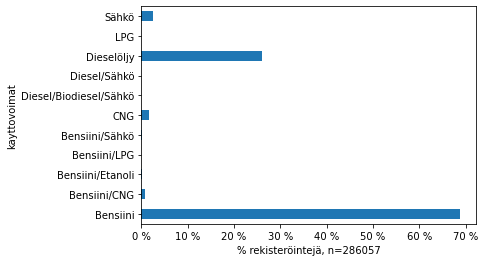

In [22]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['kayttovoimat'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['%'].plot.barh()

# y-akselin otsikko
ax1.set_ylabel("kayttovoimat")

# x-akselin otsikko
ax1.set_xlabel('% rekisteröintejä, n=' + str(n))

# x-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

# Kaavion tallentaminen
#plt.savefig('frekvenssi.png', bbox_inches='tight')

In [23]:
# Vaihteisto selväkielisinä (löytyvät Excel-muotoisesta aineistokuvauksesta)
vaihteistot = {'1':'Manuaali',      
    '2':'Automaatti',
    '3':'Portaaton',
    '4':'Käsivalintainen/automaattinen',
    '5':'Variaattori',
    '6':'Muuttuvavälityksinen',
    '7':'Jalkavalintainen',
    'X':'Ei sovellettavissa',
    'Y':'Muu'}
df['vaihteistot'] = df['vaihteisto'].replace(vaihteistot)

In [24]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['vaihteistot'], 'Lukumäärä')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['Lukumäärä'].sum()
df1['%'] = (df1['Lukumäärä'] / n) * 100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun tuunaus
df1.style.format({'Lukumäärä' : '{:.0f}', '%' : '{:.1f}'})

,Lukumäärä,%
vaihteistot,,
1.0,3,0.0
2.0,5,0.0
Automaatti,179059,63.0
Ei sovellettavissa,1249,0.4
Jalkavalintainen,3,0.0
Käsivalintainen/automaattinen,27,0.0
Manuaali,59380,20.9
Muu,8462,3.0
Portaaton,36232,12.7


In [25]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['vaihteistot'], 'Lukumäärä')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['Lukumäärä'].sum()
df1['%'] = (df1['Lukumäärä'] / n) * 100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun tuunaus
df1.style.format({'Lukumäärä' : '{:.0f}', '%' : '{:.1f}'})

,Lukumäärä,%
vaihteistot,,
1.0,3,0.0
2.0,5,0.0
Automaatti,179059,63.0
Ei sovellettavissa,1249,0.4
Jalkavalintainen,3,0.0
Käsivalintainen/automaattinen,27,0.0
Manuaali,59380,20.9
Muu,8462,3.0
Portaaton,36232,12.7


<ipython-input-26-1d0cbfa99ea7>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])


[Text(0.0, 0, '0 %'),
 Text(10.0, 0, '10 %'),
 Text(20.0, 0, '20 %'),
 Text(30.0, 0, '30 %'),
 Text(40.0, 0, '40 %'),
 Text(50.0, 0, '50 %'),
 Text(60.0, 0, '60 %'),
 Text(70.0, 0, '70 %')]

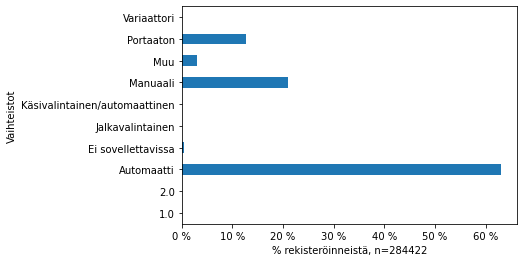

In [26]:
# Lukumäärät crosstab-funktiolla
df1 = pd.crosstab(df['vaihteistot'], 'lkm')

# Häiritsevän otsikon poisto
df1.columns.name=''

# Prosentit
n = df1['lkm'].sum()
df1['%'] = (df1['lkm']/n)*100

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Ulkoasun viimeistely
df1.style.format({'lkm': '{:.0f}', '%': '{:.1f} %'})

# Vaakapylväskaavio (Yhteensä-rivin tietoja ei oteta mukaan)
ax1 = df1.drop('Yhteensä')['%'].plot.barh()

# y-akselin otsikko
ax1.set_ylabel("Vaihteistot")

# x-akselin otsikko
ax1.set_xlabel('% rekisteröinneistä, n=' + str(n))

# x-akselin prosenttilukujen ulkoasun viimeistely
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

# Kaavion tallentaminen
#plt.savefig('frekvenssi.png', bbox_inches='tight')

In [27]:
# 20 suosituinta merkkiä
df_suositut = pd.crosstab(df['mallimerkinta'], 'Lukumäärä').nlargest(n = 20, columns = 'Lukumäärä' )
df_suositut

col_0,Lukumäärä
mallimerkinta,
Nissan Qashqai Monikäyttöajoneuvo (AF) 4ov 1332cm3 A,4545
TOYOTA COROLLA Farmari (AC) 4ov 1798cm3,4293
OCTAVIA Farmari (AC) 4ov 1498cm3 A,3985
TOYOTA C-HR Viistoperä (AB) 4ov 1798cm3,3202
TOYOTA RAV4 Farmari (AC) 4ov 2487cm3,2980
PASSAT Farmari (AC) 5ov 1395cm3 A,2828
V60 Farmari (AC) 5ov 1969cm3 A,2556
TOYOTA YARIS Monikäyttöajoneuvo (AF) 5ov 1496cm3,2452
TOYOTA COROLLA Farmari (AC) 4ov 1987cm3,2383
